---
# Caso Mall Customers

Se cuenta con un dataset de clientes de un importante mall de la ciudad. Los datos son los siguientes:

- CustomerID: correlativo identificador del cliente
- Genre: sexo del cliente
- Age: edad del cliente
- Annual Income: sueldo anual en miles de dolares
- Spending Score: score de gasto calculado para el cliente, mientras mayor más gasta

Se busca realizar una caracterización de los clientes, para lo cual se le solicita que realice una **Clusterización Jerárquica** considerando solamente las variables **Annual Income** y **Spending Score**. Se busca contestar las siguientes preguntas:

- Cuántos clusters se aprecian
- Qué grupo de clientes es representado en cada cluster

---

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Carga de datos

In [37]:
dataset = pd.read_csv('Mall_Customers.csv')

In [38]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Formulación del Modelo

In [39]:
# Usaremos solo las columnas de interés: Annual Income (k$) y Spending Score (1-100)
X = dataset[["Annual Income (k$)", "Spending Score (1-100)"]].values

### Escalamiento

In [40]:
from sklearn.preprocessing import StandardScaler

# Escalamiento de las variables (recomendado para clustering por distancia)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

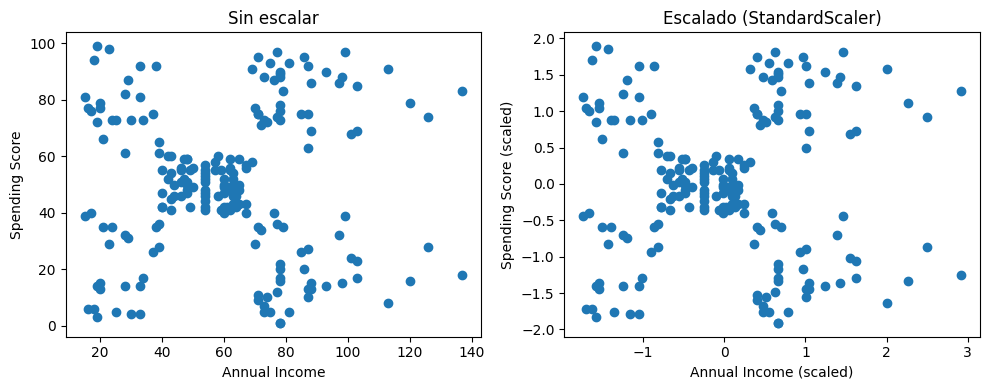

In [41]:
# Opcional: comparar distribución antes y después del escalamiento
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].scatter(X[:, 0], X[:, 1])
axes[0].set_title('Sin escalar')
axes[0].set_xlabel('Annual Income')
axes[0].set_ylabel('Spending Score')

axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1])
axes[1].set_title('Escalado (StandardScaler)')
axes[1].set_xlabel('Annual Income (scaled)')
axes[1].set_ylabel('Spending Score (scaled)')

plt.tight_layout()
plt.show()

In [42]:
# Para el resto del ejercicio utilizaremos X_scaled como entrada al algoritmo
X_for_clust = X_scaled

### Clusterización Jerárquica

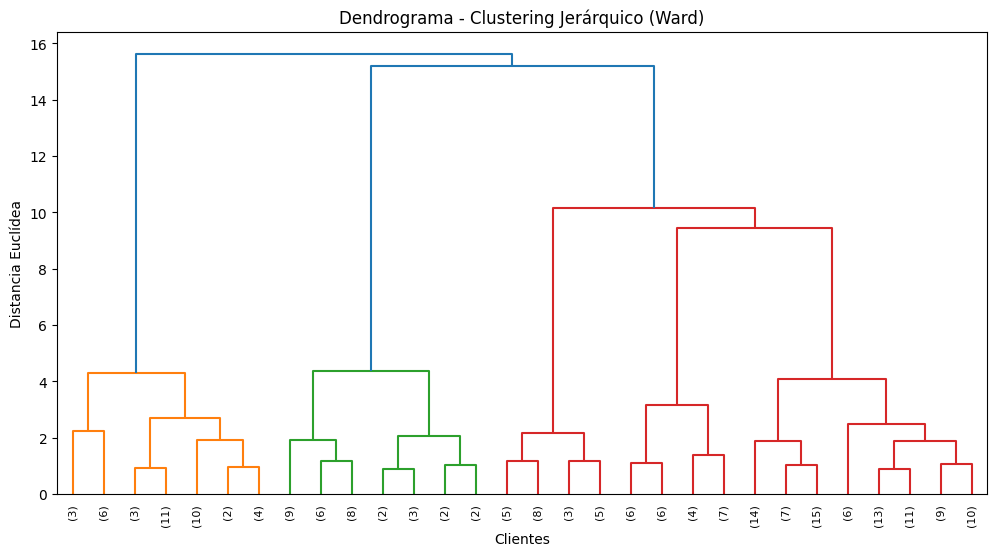

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Matriz de ligamiento usando método ward (minimiza varianza intra-cluster)
Z = linkage(X_for_clust, method='ward')

plt.figure(figsize=(12, 6))
plt.title('Dendrograma - Clustering Jerárquico (Ward)')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclídea')

dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=8.)
plt.show()

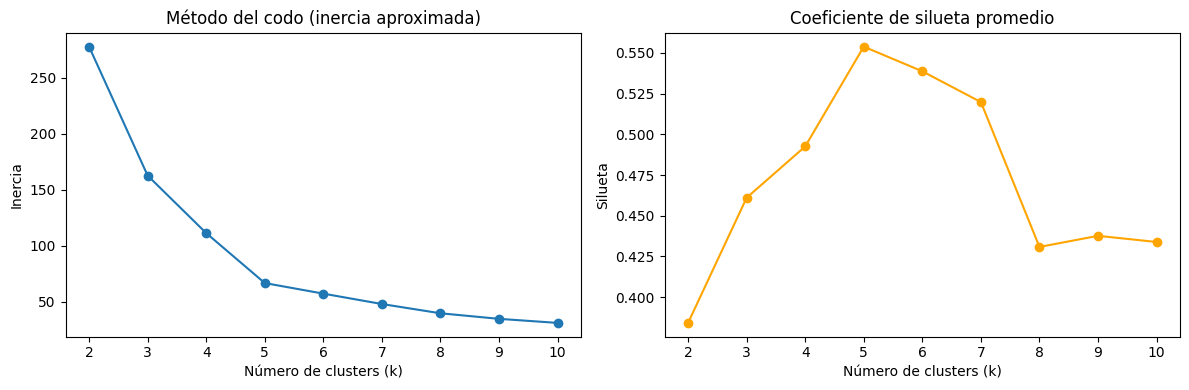

k = 2, silueta promedio = 0.384
k = 3, silueta promedio = 0.461
k = 4, silueta promedio = 0.493
k = 5, silueta promedio = 0.554
k = 6, silueta promedio = 0.539
k = 7, silueta promedio = 0.520
k = 8, silueta promedio = 0.431
k = 9, silueta promedio = 0.438
k = 10, silueta promedio = 0.434


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Método del codo: probamos distintos números de clusters y calculamos la inercia aproximada
range_n_clusters = range(2, 11)
inertias = []
silhouettes = []

for k in range_n_clusters: # 2,3,4,5,6,7,7,9,10
    hc = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    labels = hc.fit_predict(X_for_clust)

    # Inercia aproximada: suma de distancias cuadráticas al centroide de cada cluster
    inertia_k = 0
    for c in np.unique(labels):
        cluster_points = X_for_clust[labels == c]
        center = cluster_points.mean(axis=0)
        inertia_k += ((cluster_points - center) ** 2).sum()
    inertias.append(inertia_k)

    # Coeficiente de silueta promedio
    silhouettes.append(silhouette_score(X_for_clust, labels))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(list(range_n_clusters), inertias, marker='o')
plt.title('Método del codo (inercia aproximada)')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(list(range_n_clusters), silhouettes, marker='o', color='orange')
plt.title('Coeficiente de silueta promedio')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silueta')

plt.tight_layout()
plt.show()

for k, s in zip(range_n_clusters, silhouettes):
    print(f'k = {k}, silueta promedio = {s:.3f}')

In [45]:
from sklearn.cluster import AgglomerativeClustering

# A partir del dendrograma, el método del codo y la silueta,
# elija un número de clusters razonable. Aquí usaremos 5 como ejemplo.
print("Valores de silueta:", silhouettes)
best_k = list(range_n_clusters)[np.argmax(silhouettes)]
print(f"Mejor k según silueta: {best_k}")

n_clusters_final = 5
hc_final = AgglomerativeClustering(n_clusters=n_clusters_final, metric='euclidean', linkage='ward')
cluster_labels = hc_final.fit_predict(X_for_clust)

np.unique(cluster_labels, return_counts=True)

Valores de silueta: [np.float64(0.3842337621772661), np.float64(0.4610481446570447), np.float64(0.4925507715349343), np.float64(0.5538089226688662), np.float64(0.5386761871036926), np.float64(0.5197949293475768), np.float64(0.4308617778221774), np.float64(0.43768997758154127), np.float64(0.4339007174968657)]
Mejor k según silueta: 5


(array([0, 1, 2, 3, 4]), array([32, 39, 85, 21, 23]))

In [46]:
# Guardamos los labels para usarlos en gráficos y análisis posteriores
labels = cluster_labels

In [47]:
# Resumen rápido de cuántos clientes hay en cada cluster
cluster_ids, counts = np.unique(labels, return_counts=True)
for cid, cnt in zip(cluster_ids, counts):
    print(f"Cluster {cid}: {cnt} clientes")

Cluster 0: 32 clientes
Cluster 1: 39 clientes
Cluster 2: 85 clientes
Cluster 3: 21 clientes
Cluster 4: 23 clientes


### Grafique los resultados

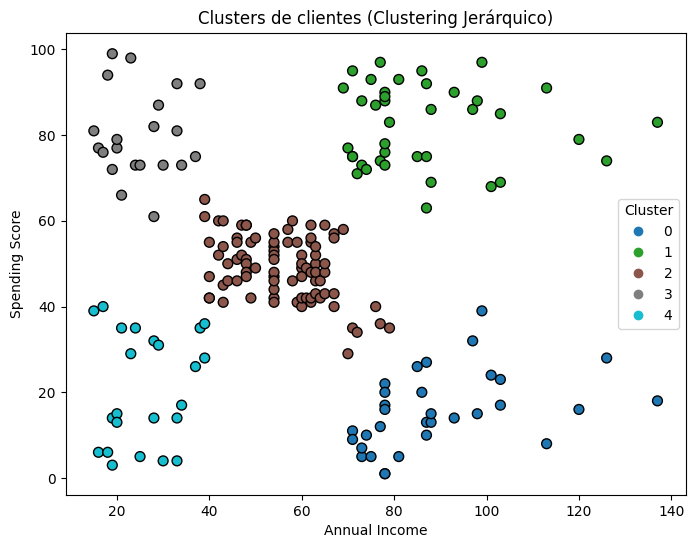

In [48]:
# Gráfico de dispersión de Annual Income vs Spending Score coloreado por cluster
plt.figure(figsize=(8, 6))

scatter = plt.scatter(
    X[:, 0], X[:, 1],
    c=labels,
    cmap='tab10',
    s=50,
    edgecolor='k'
)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clusters de clientes (Clustering Jerárquico)')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.show()

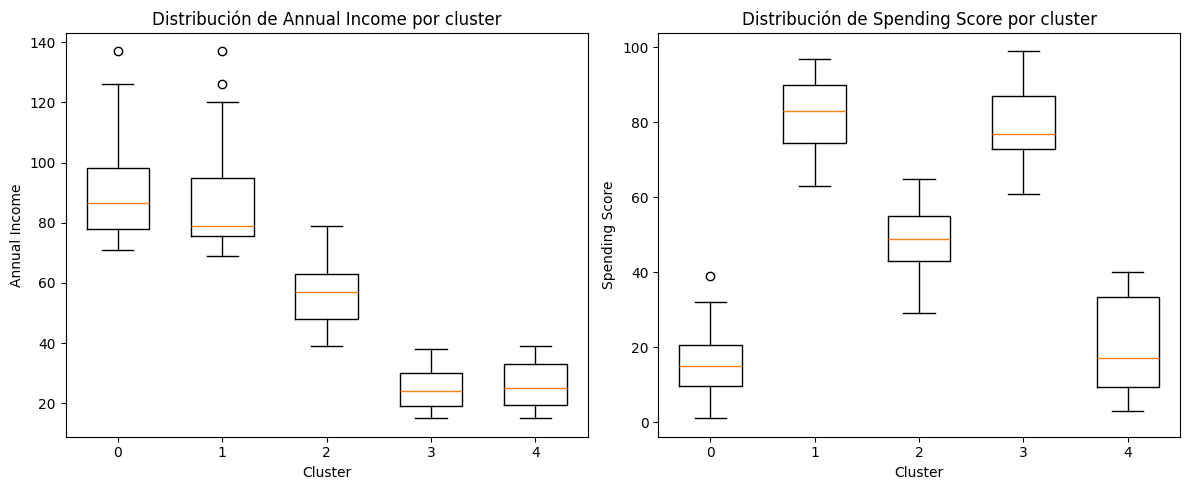

In [49]:
# Boxplots para entender el perfil de cada cluster en las dos variables
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for cid in np.unique(labels):
    axes[0].boxplot(
        [X[labels == cid, 0]],
        positions=[cid],
        widths=0.6
    )
axes[0].set_xticks(cluster_ids)
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Annual Income')
axes[0].set_title('Distribución de Annual Income por cluster')

for cid in np.unique(labels):
    axes[1].boxplot(
        [X[labels == cid, 1]],
        positions=[cid],
        widths=0.6
    )
axes[1].set_xticks(cluster_ids)
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Spending Score')
axes[1].set_title('Distribución de Spending Score por cluster')

plt.tight_layout()
plt.show()

### Modifique dataset original con resultados de la clusterización

In [50]:
# Agregar la etiqueta de cluster al dataset original
# (sumamos 1 para que los clusters vayan de 1..k en lugar de 0..k-1)
dataset['Cluster'] = labels + 1

dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,4
2,3,Female,20,16,6,5
3,4,Female,23,16,77,4
4,5,Female,31,17,40,5


In [51]:
# Resumen de cada cluster: cantidad de clientes y promedios de las principales variables
cluster_summary = dataset.groupby('Cluster').agg({
    'CustomerID': 'count',
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
}).rename(columns={'CustomerID': 'NumClientes'})

cluster_summary

,NumClientes,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
1,32,41.000000,89.406250,15.593750
2,39,32.692308,86.538462,82.128205
3,85,42.482353,55.811765,49.129412
4,21,25.333333,25.095238,80.047619
5,23,45.217391,26.304348,20.913043


## 5. Comparación y análisis

- Compare **las características de los clusters** obtenidos:
    - ¿Qué diferencias observa entre los grupos en cuanto a **ingreso anual** y **spending score**?
    - ¿Algún cluster representa clientes de alto valor o clientes con bajo gasto?
- Analice:
    - ¿Cuántos clusters se aprecian claramente según el dendrograma y las métricas?
    - ¿Qué perfil de cliente predomina en cada cluster?
    - ¿Cómo podría el mall utilizar esta segmentación para estrategias de marketing o fidelización?

A partir de estas observaciones redacte sus **conclusiones** sobre la utilidad de la clusterización jerárquica para la segmentación de clientes en el contexto del mall.

---

> **Nota:** Recuerde que todas las explicaciones y análisis deben estar redactados en español, siguiendo el estándar educativo del bootcamp. Utilice comentarios bilingües en las celdas de código y asegúrese de que los resultados sean claros para comparar los diferentes grupos de clientes.